In [2]:
import numpy as np
import matplotlib.pyplot as plt

from hopfiled import HopfieldNet
from hopfiled import preprocesar
from PIL import Image


from IPython.display import clear_output


In [3]:
def diferencia(patron1, patron2):
    '''
    Cuenta el número de diferencias entre dos patrones
    patron1 y patron2 deben ser vectores de numpy.
    '''
    return np.sum((patron1 != patron2))

def generar_patron(shape):
    '''
    Genera un patrón aleatorio de tamaño shape.
    '''
    return np.random.choice([1, -1], size=shape)

def test_hopfield(shape, N):
    '''
    shape: tupla con el tamaño de la red
    Realiza N pruebas para una red de hopfield de tamaño shape.
    Devuelve una lista con el número de diferencias entre el patrón
    original y el patrón recuperado.
    '''
    patron1 = generar_patron(shape)
    patrones = [patron1]
    dife = []

    for _ in range(N):
        patron = generar_patron(shape)
        hopfield = HopfieldNet(shape)
        patrones.append(patron)
        hopfield.train(patrones)
        state = hopfield.update(patrones[0], int(10*shape[0]*shape[1])).reshape(shape)
        diff = diferencia(patron1, state)
        dife.append(diff)
    return dife


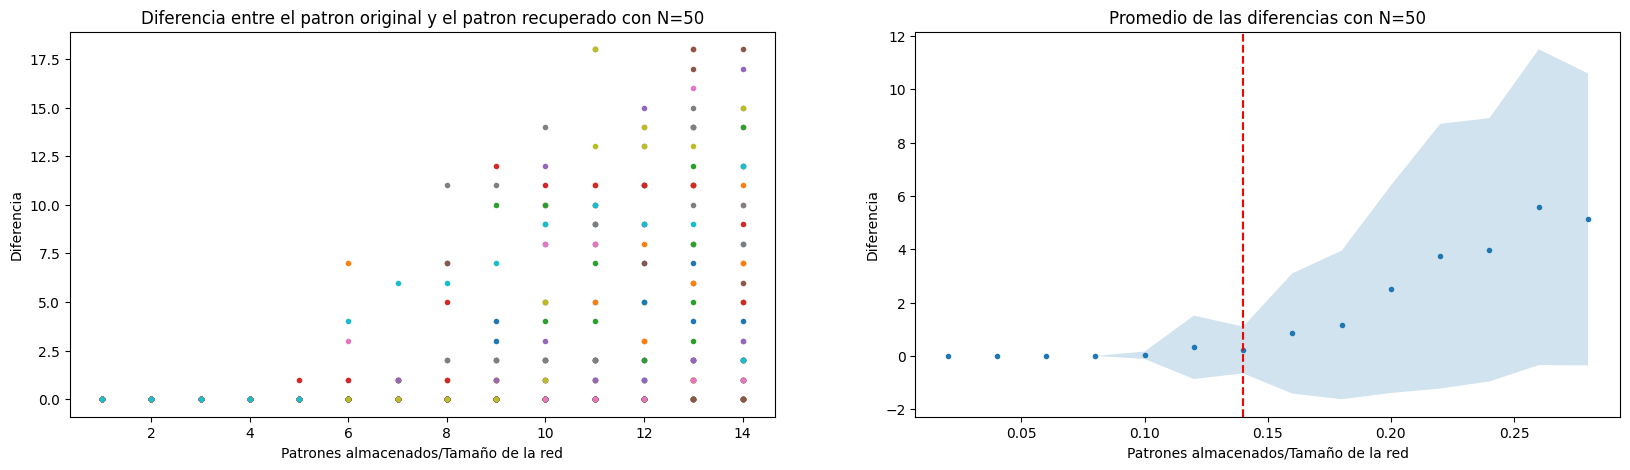

In [4]:
shape = (50, 1)
error = []
plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
plt.title(f'Diferencia entre el patron original y el patron recuperado con N={shape[0]*shape[1]}')
plt.ylabel('Diferencia')
plt.xlabel('Patrones almacenados/Tamaño de la red')
x = np.arange(1,int(shape[0]*shape[1]*0.3))
for _ in range(50):
    diff = test_hopfield(shape, x[-1])
    error.append(diff)
    plt.plot(x,diff,'.')

plt.subplot(1, 2, 2)
plt.title(f'Promedio de las diferencias con N={shape[0]*shape[1]}')
plt.ylabel('Diferencia')
plt.xlabel('Patrones almacenados/Tamaño de la red')
plt.plot(x/(shape[0]*shape[1]), np.mean(error, axis=0),'.')
# Ahora voy a añadir una banda de color de anchura la desviación estandar
plt.fill_between(x/(shape[0]*shape[1]), np.mean(error, axis=0)-np.std(error, axis=0), np.mean(error, axis=0)+np.std(error, axis=0), alpha=0.2)
# y una barra vertical en el punto donde se encuentra el cambio de comportamiento
plt.axvline(x=0.14, color='red', linestyle='--')
plt.show()

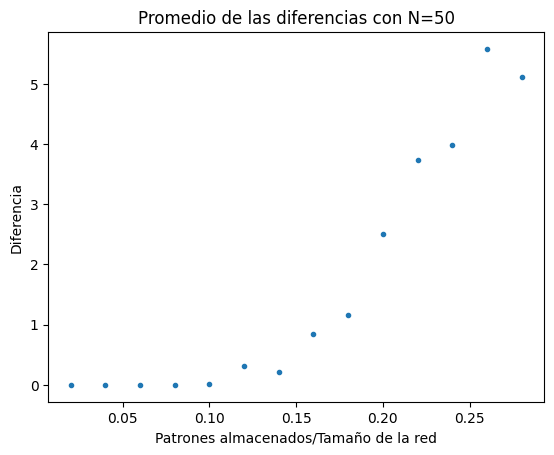

In [5]:

plt.title(f'Promedio de las diferencias con N={shape[0]*shape[1]}')
plt.ylabel('Diferencia')
plt.xlabel('Patrones almacenados/Tamaño de la red')
plt.plot(x/(shape[0]*shape[1]), np.mean(error, axis=0),'.')
plt.show()

In [6]:
def plot_test(shape, N=int(shape[0]*shape[1]/2)):
    shape = shape
    error = []
    plt.figure(figsize=(20, 5))
    plt.subplot(1, 2, 1)
    plt.title(f'Diferencia entre el patron original y el patron recuperado con I={shape[0]*shape[1]}')
    plt.ylabel('Diferencia')
    plt.xlabel('Patrones almacenados/Tamaño de la red')
    x = np.arange(1,int(shape[0]*shape[1]*0.3))
    for _ in range(N):
        diff = test_hopfield(shape, x[-1])
        error.append(diff)
        plt.plot(x,diff,'.')

    plt.subplot(1, 2, 2)
    plt.title(f'Promedio de las diferencias con I={shape[0]*shape[1]}')
    plt.ylabel('Diferencia')
    plt.xlabel('Patrones almacenados/Tamaño de la red')
    plt.plot(x/(shape[0]*shape[1]), np.mean(error, axis=0),'.')
    # Ahora voy a añadir una banda de color de anchura la desviación estandar
    plt.fill_between(x/(shape[0]*shape[1]), np.mean(error, axis=0)-np.std(error, axis=0), np.mean(error, axis=0)+np.std(error, axis=0), alpha=0.2)
    # y una barra vertical en el punto donde se encuentra el cambio de comportamiento
    plt.axvline(x=0.14, color='red', linestyle='--')
    plt.show()
    return x/(shape[0]*shape[1]) ,error

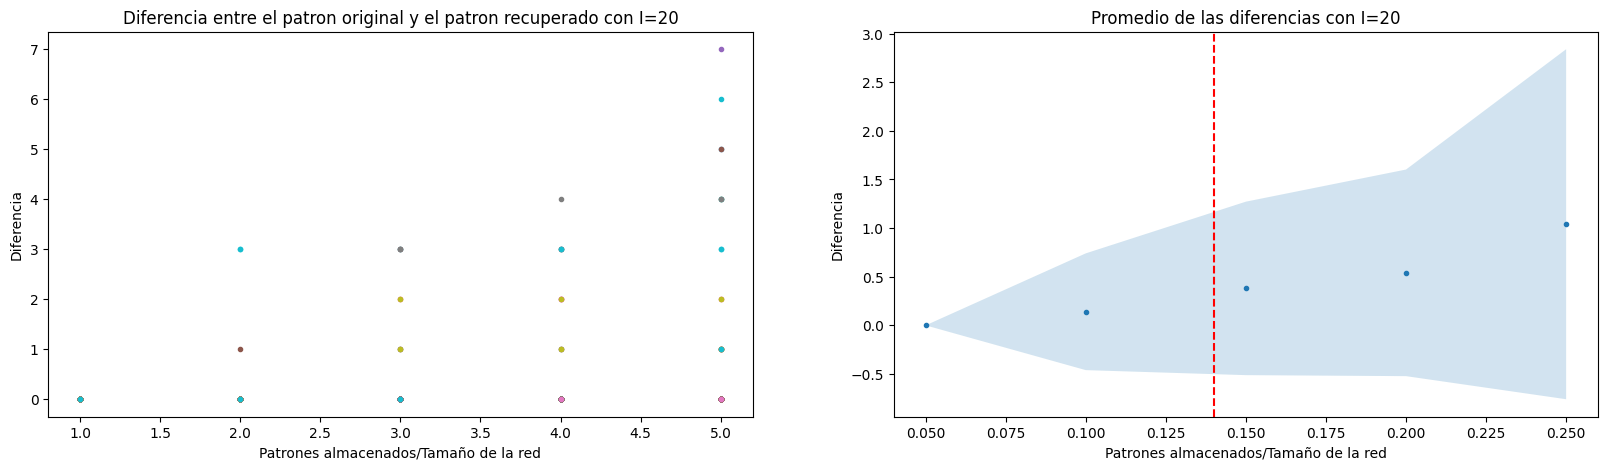

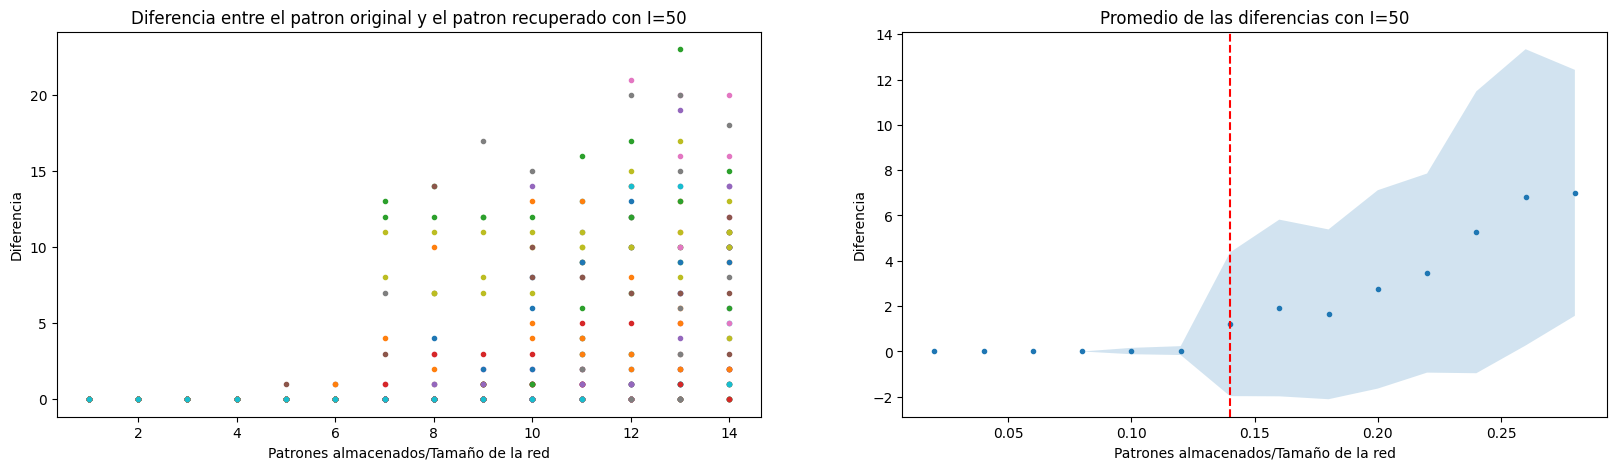

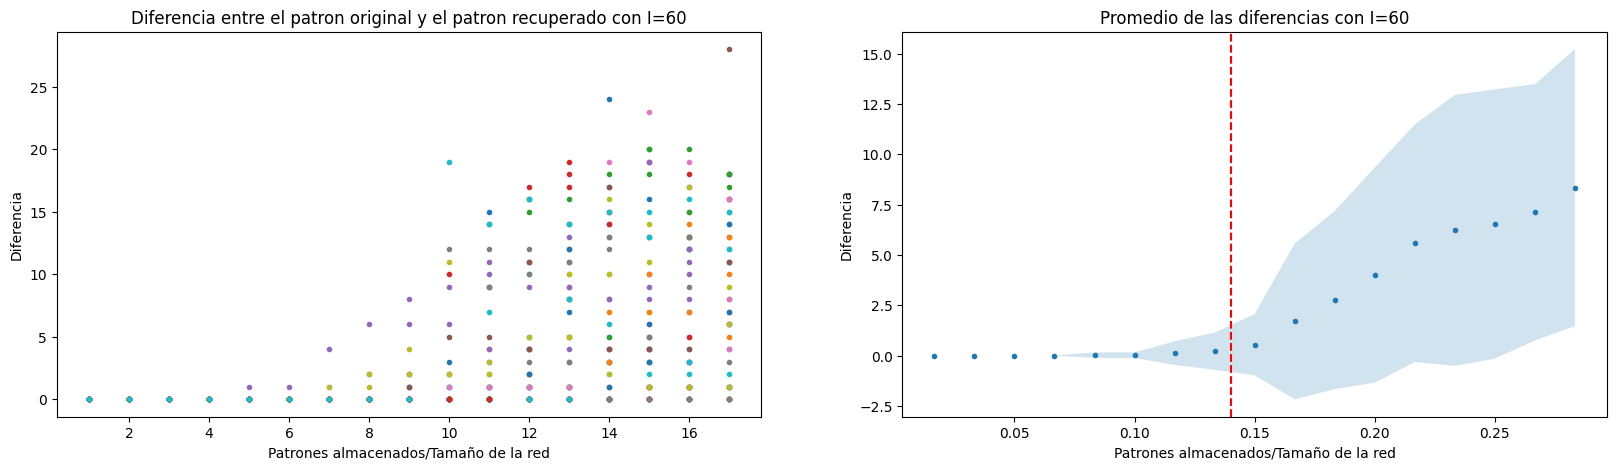

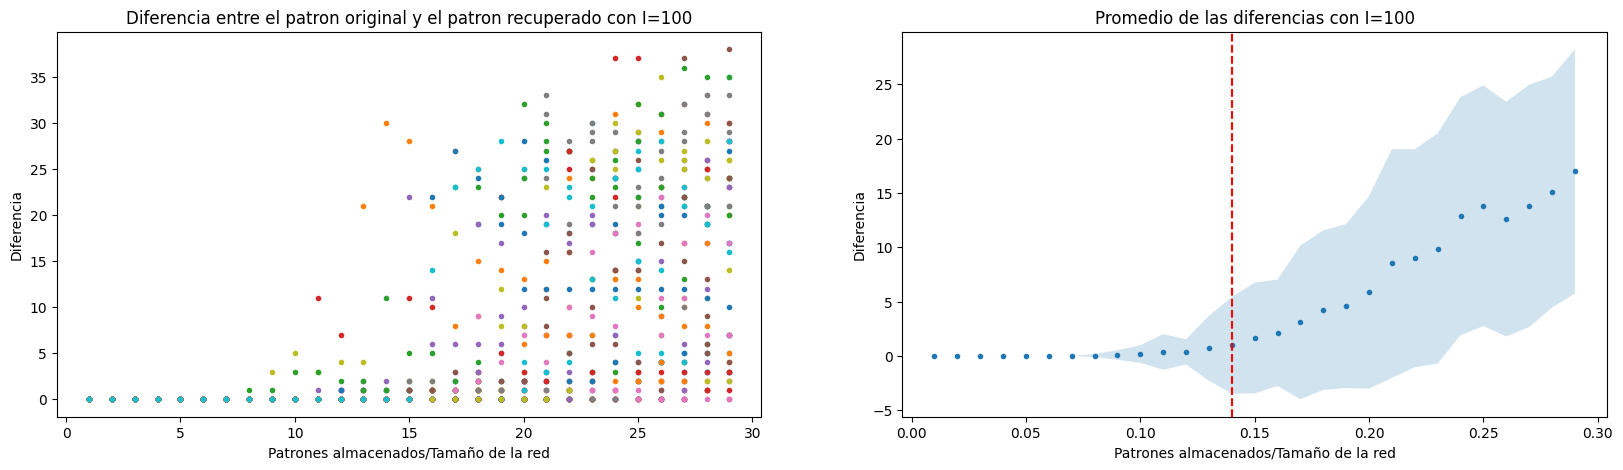

In [62]:
I = [20,50,60,100]
d_fases = []
x_fases = []
for i in I:
    x, error = plot_test((i, 1), N=50)
    d_fases.append(error)
    x_fases.append(x)


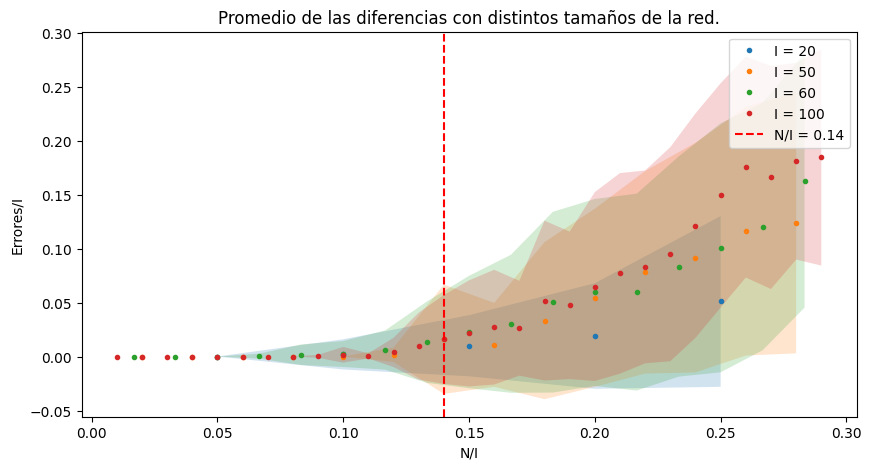

In [8]:
plt.figure(figsize=(10, 5))
for x, d, i in zip(x_fases, d_fases, I):
    plt.plot(x, np.mean(d, axis=0)/i,'.', label = f'I = {i}')
    # banda de error
    plt.fill_between(x, (np.mean(d, axis=0)-np.std(d, axis=0))/i, (np.mean(d, axis=0)+np.std(d, axis=0))/i, alpha=0.2)
# barra vertical
plt.axvline(x=0.14, color='red', linestyle='--', label = 'N/I = 0.14')

plt.title(f'Promedio de las diferencias con distintos tamaños de la red.')
plt.ylabel('Errores/I')
plt.xlabel('N/I')
plt.legend()
plt.show()

In [60]:
# hacemos una función para ver gráficamente la evolución de la red viendo las diferencias.
def graficDiferencias(Npatrones, shape, steps=10, Niter=20):
    '''
    función para ver gráficamente como evoluciona la red en función del tamaño de la red y el número de patrones.
    Npatrones: número de patrones que se van a almacenar en la red.
    shape: tamaño de la red.
    steps: número de pasos que da la red en cada iteración.
    Niter: número de iteraciones.
    '''

    patrones = []

    # Entrenamos la red con Npatrones patrones aleatorios igual que en la red normal.
    for i in range(Npatrones):
        patron = np.random.choice([1, -1], size=shape)
        patrones.append(patron)

    net = HopfieldNet(shape)
    net.train(patrones)

    # Añadimos un error aleatorio en el patrón que queremos recuperar.
    # Generar coordenadas aleatorias
    i, j = np.random.randint(0, shape[0], size=2)
    # Cambiar el valor en las coordenadas generadas
    state = patrones[-1].copy()
    state[i, j] = -1 if patrones[-1][i, j] == 1 else 1

    # Inicializamos la lista de diferencias
    diff = [diferencia(patrones[-1], state)]

    c = 0 # contador para parar el bucle si la red ha corregido el patrón.
    for i in range(Niter):
        # Actualizamos la red como normalmente.
        state = net.update(state, steps = steps).reshape(patrones[-1].shape)
        diff.append(diferencia(patrones[-1], state))
        if diff[-1] == 0: # la condición para que se pare se va llenando el contador.
            c += 1
        
        # Graficamos el estado de la red y el patrón original.
        plt.figure(figsize=(20, 10))
        plt.subplot(1, 2, 1)
        plt.imshow(state, cmap='Blues_r')
        plt.imshow(patrones[-1], cmap='gray', alpha=0.5)
        plt.title(f'Imagen corregida \n err={np.round(diff[-1], 4)}')
        plt.subplot(1, 2, 2)
        plt.plot(diff)
        plt.xlabel('Iteraciones')
        plt.ylabel('Diferencia') 
        plt.title('Diferencia')
        plt.show()
        clear_output(wait=True)

        if c == 5: # Si la red lleva 5 iteraciones corregida se para el bucle.
            break

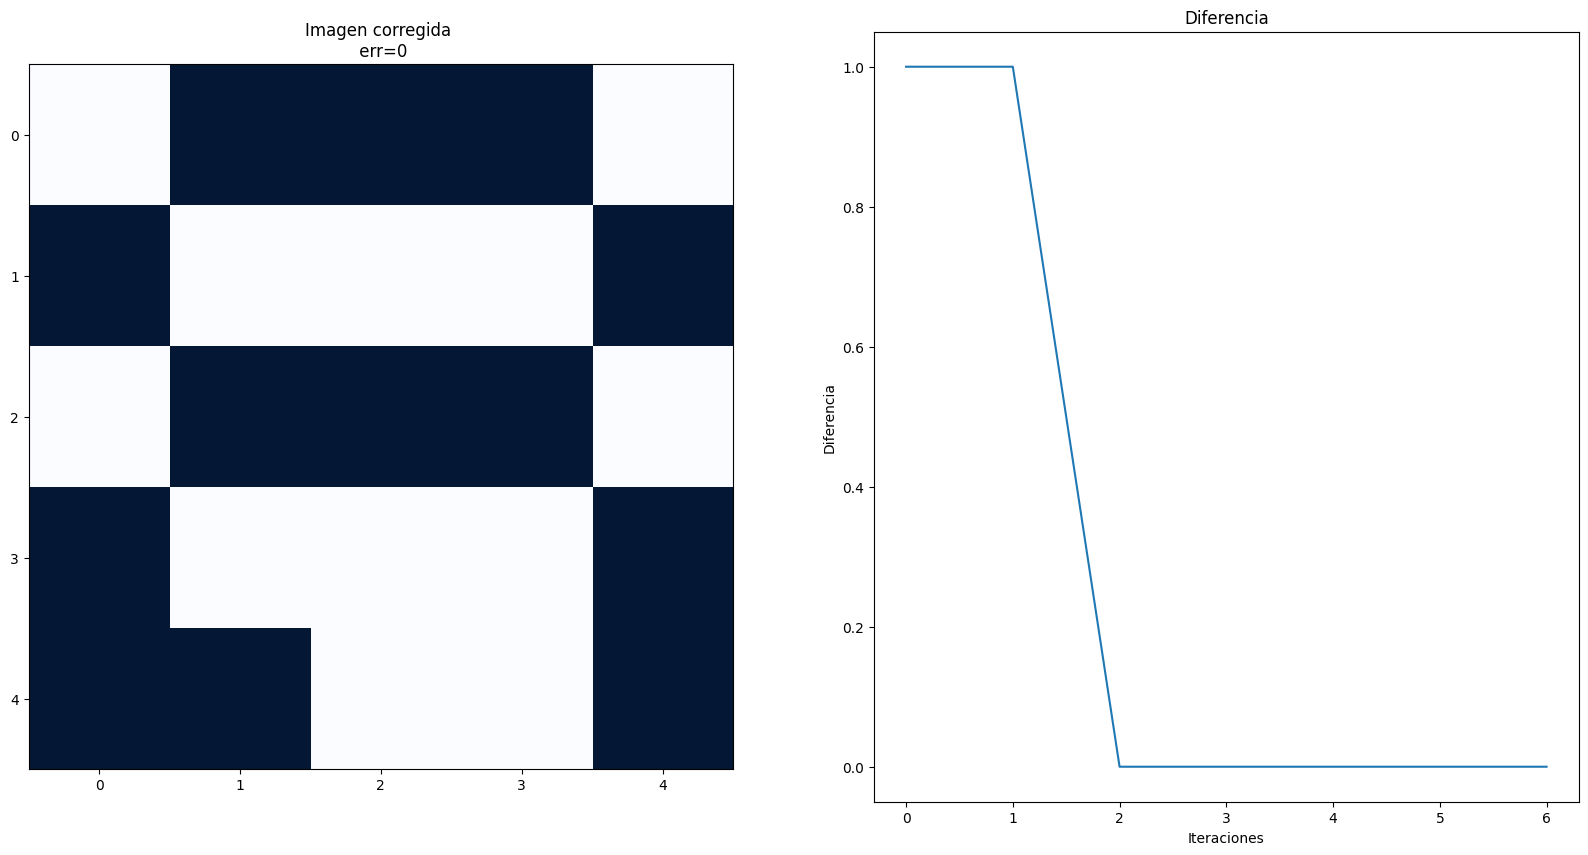

In [57]:
graficDiferencias(5, (5,5))

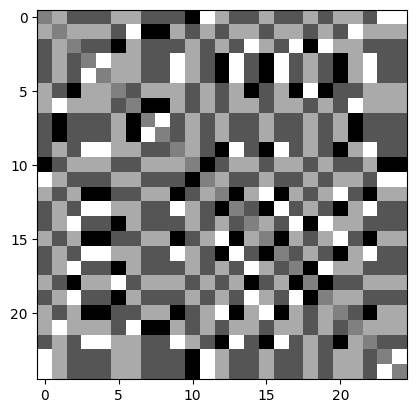

In [58]:
plt.imshow(net.weights, cmap='gray')
plt.show()